 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [13]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [14]:
# Reading whale returns
whale_returns_csv = Path(r"C:\Users\andrew\finance\PandasHW-Rubi\Resources\whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

whale_df.head(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [15]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [16]:
# Drop nulls
# YOUR CODE HERE
whale_df = whale_df.dropna()


In [17]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [18]:
# Reading algorithmic returns
algo_returns_csv = Path(r"C:\Users\andrew\finance\gwu-hp-arl-fin-pt-06-2020-u-c\02-Homework\04-Pandas\Instructions\Starter_Code\Resources\algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [19]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [20]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()
# YOUR CODE HERE

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [186]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path(r"C:\Users\andrew\finance\gwu-hp-arl-fin-pt-06-2020-u-c\02-Homework\04-Pandas\Instructions\Starter_Code\Resources\sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp500_history_df.head(5)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [187]:
# Check Data Types
# YOUR CODE HERE

sp500_history_df.dtypes


Close    object
dtype: object

In [188]:
# Fix Data Types
# YOUR CODE HERE

def convert_currency(val):
    new_val = val.replace('$', '')
    return float(new_val)

sp500_history_df['Close'] = sp500_history_df['Close'].apply(convert_currency)

sp500_history_df.head(5)


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [189]:
# Calculate Daily Returns
# YOUR CODE HERE

sp500_history_df.pct_change()

sp500_DR = sp500_history_df.pct_change()

In [190]:
# Drop nulls
# YOUR CODE HERE
#sp500_history_df = sp500_history_df.dropna()

sp500_DR = sp500_DR.dropna()

sp500_DR.head(5)

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [191]:
# Rename Column
# YOUR CODE HERE
sp500_DR = sp500_DR.rename(columns={"Close": "S&P 500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [192]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

combined_df = pd.concat([whale_df, algo_returns_df, sp500_DR], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

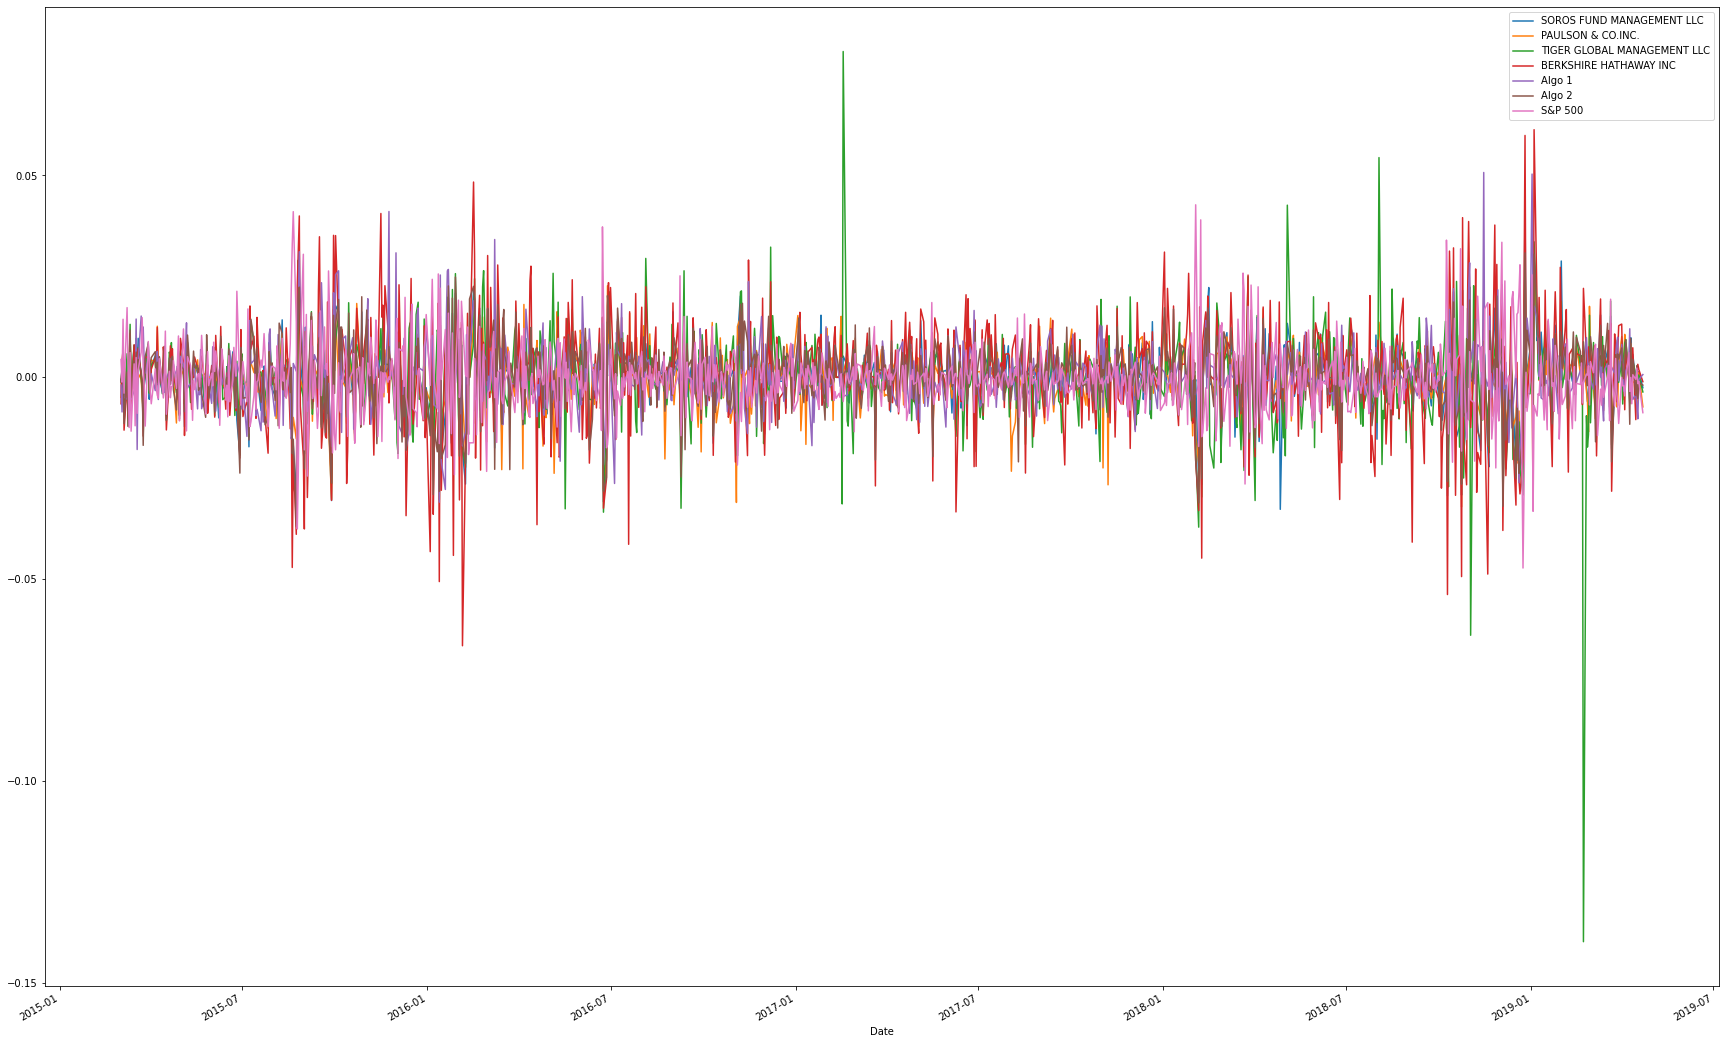

In [50]:
# Plot daily returns
#
# YOUR CODE HERE
combined_df.plot(figsize=(30,20))


Berkshire Hathaway & Argo 1 seem to outperform the S&P 500.

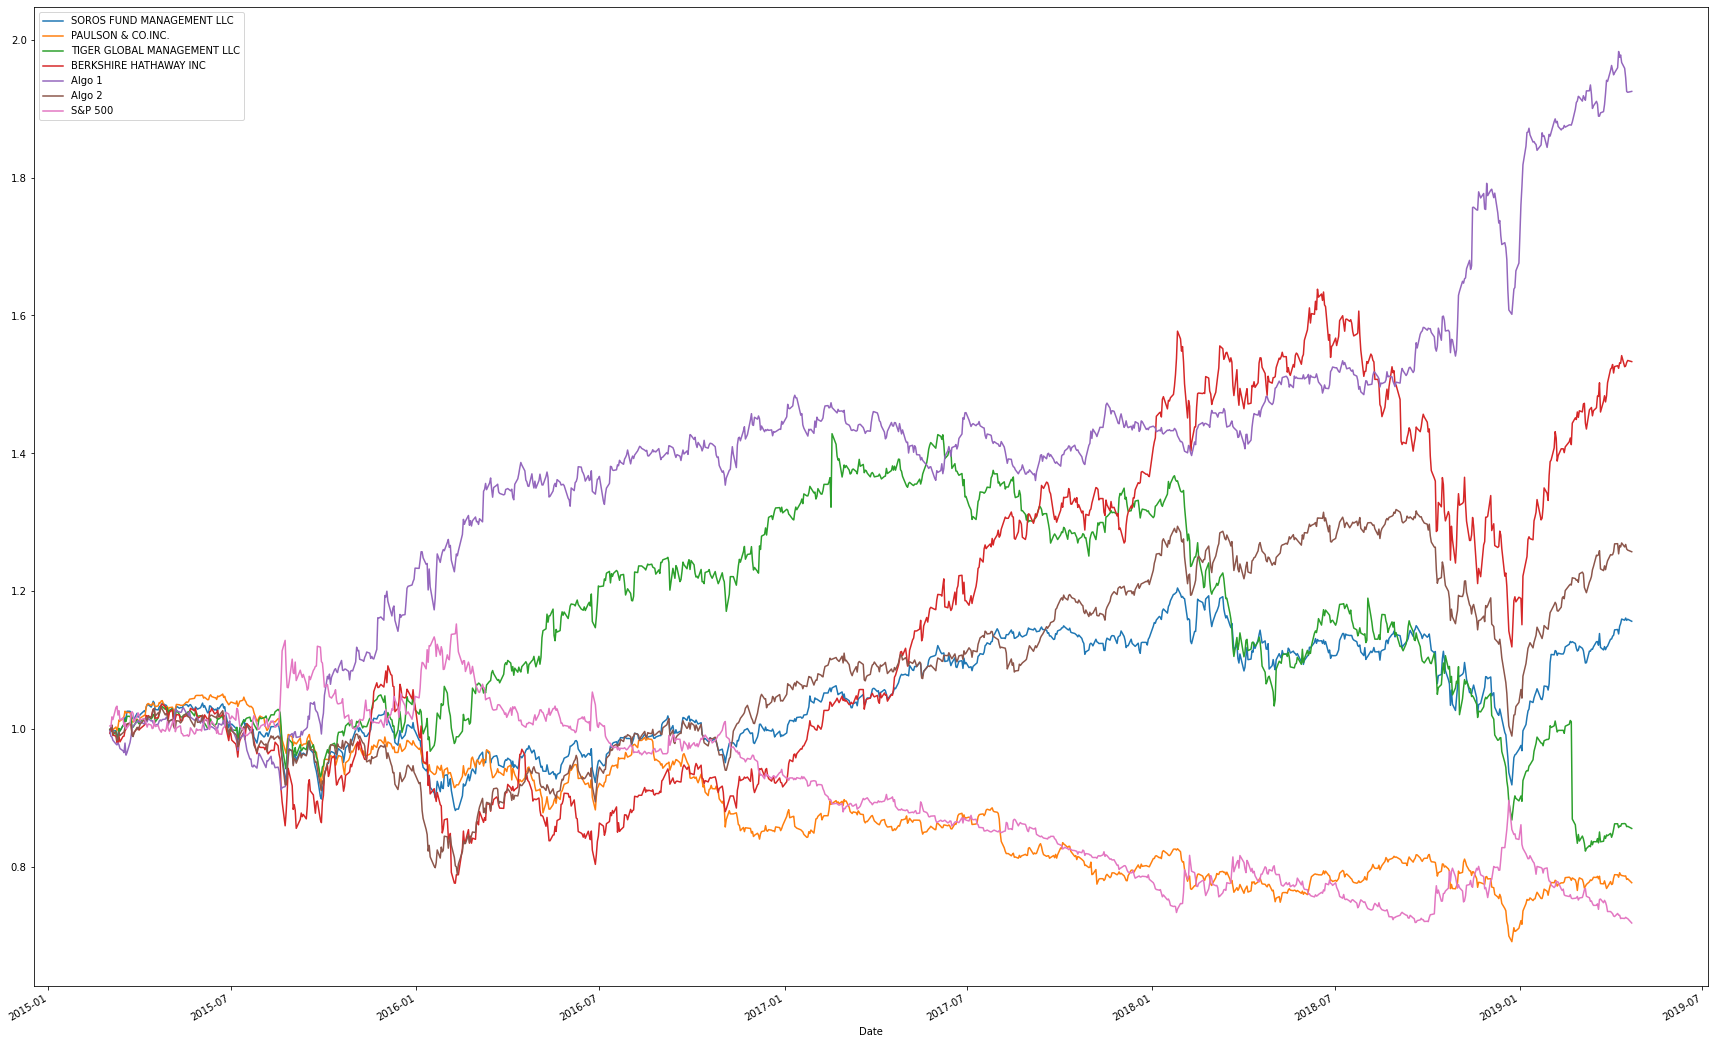

In [55]:
# Plot cumulative returns
# YOUR CODE HERE

cumulative_returns_df = (combined_df + 1).cumprod()

cumulative_returns_df.plot(figsize=(30,20))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

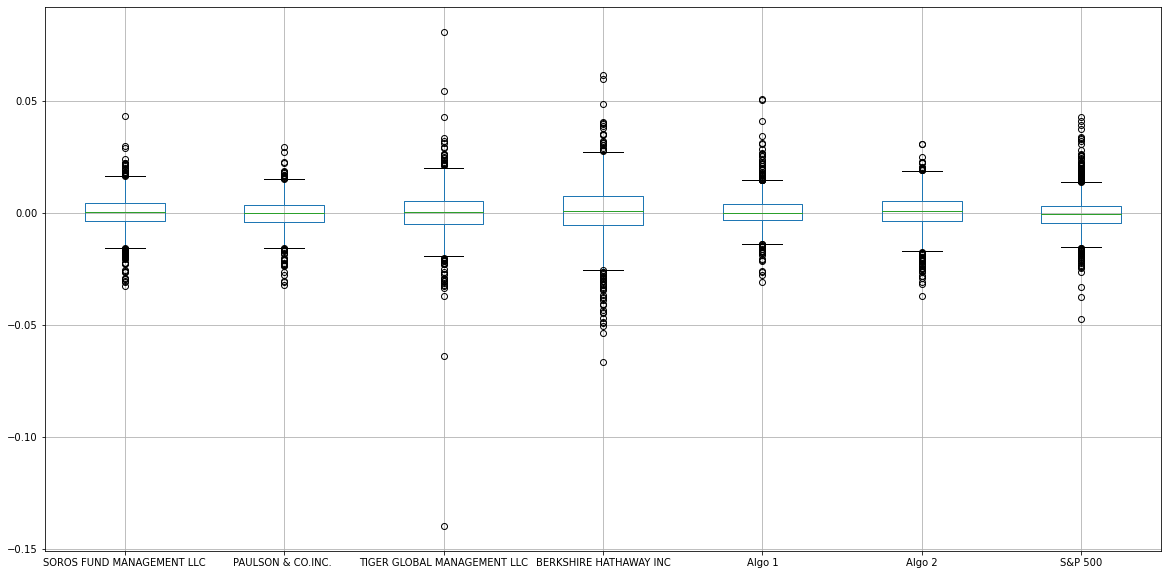

In [72]:
# Box plot to visually show risk
# YOUR CODE HERE
#calculate pandas.std
#use beta to compare to s&p500

combined_df.boxplot(figsize=(20,10))

In [128]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

daily_std = combined_df.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64


In [126]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
for x in daily_std:
    print(x>0.008587)


False
False
True
True
False
False
False


Tiger Global Mgmt LLC and Berkshire Hathaway Inc are riskier portfolios than the S&P 500.

In [122]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

annual_std = daily_std*np.sqrt(252)

print(annual_std)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

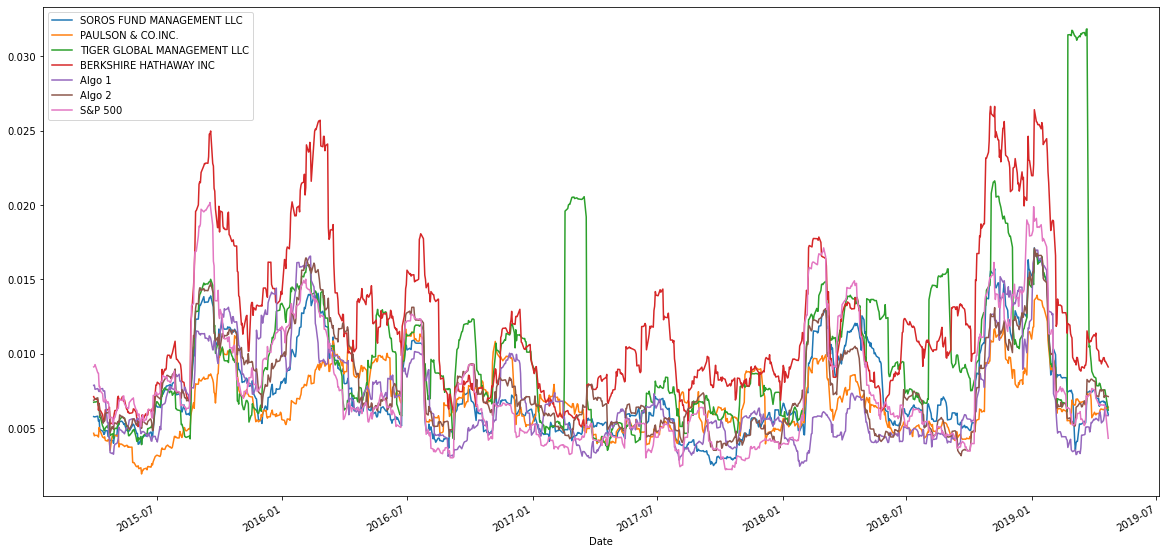

In [136]:
# Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE

daily_std_rolling = combined_df.rolling(21).std()

daily_std_rolling.plot(figsize=(20,10))


In [137]:
# Construct a correlation table
# YOUR CODE HERE
correlation_df = combined_df.corr()

correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


7.373467552840441e-05


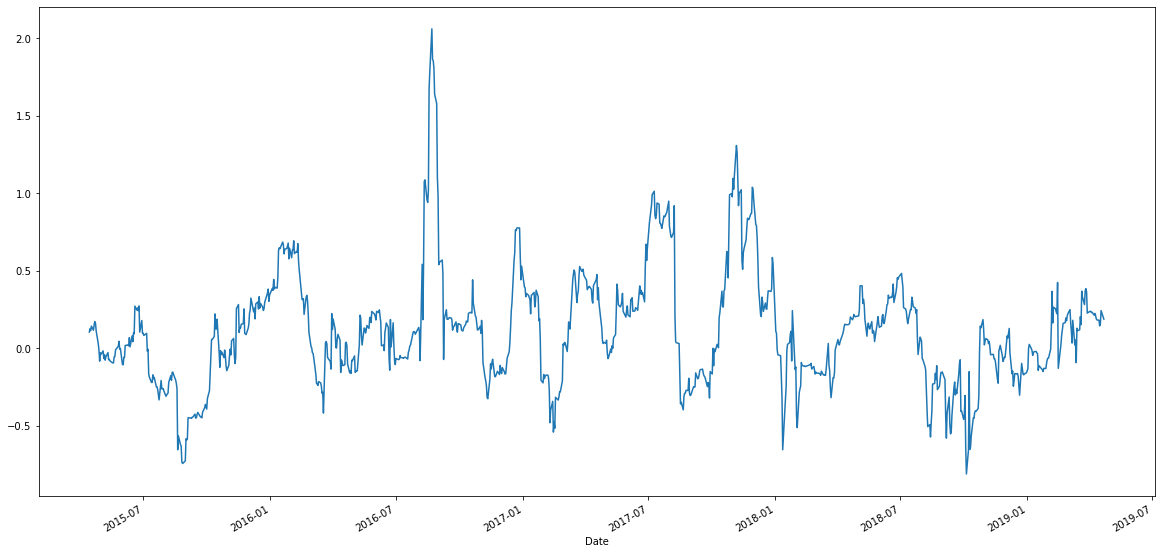

In [151]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

rolling_whale_covarience = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(combined_df['S&P 500'])

rolling_variance = combined_df['S&P 500'].rolling(window=30).var()
print(variance)

rolling_whale_beta = rolling_whale_covarience / rolling_variance

rolling_whale_beta.plot(figsize=(20,10))

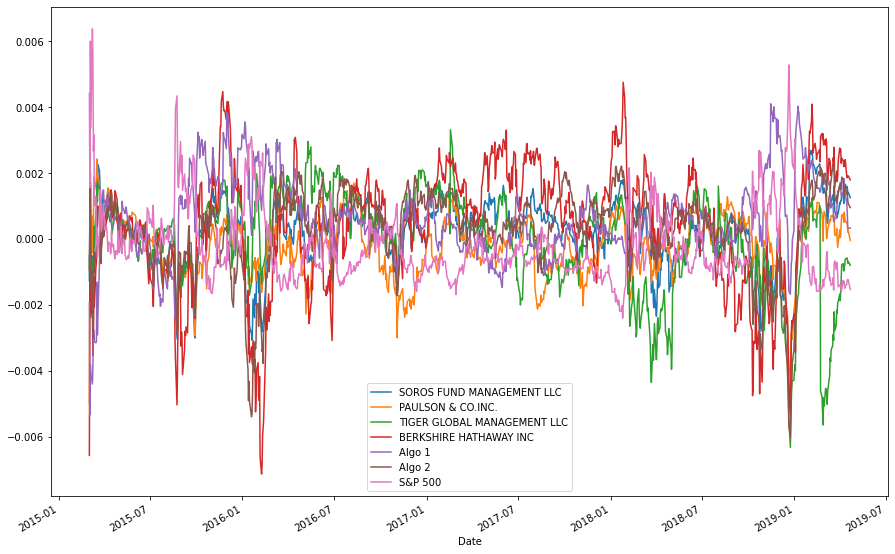

In [178]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

short_rolling = combined_df.rolling(window=20).mean()
#short_rolling.head(5)
#Date range start 2015-03-03 

#long_rolling = combined_df.rolling(window=100).mean()
#long_rolling.tail(5)
#Date range end 2019-04-22


#combined_df.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0)(span=100).mean().plot(figsize=(30,15))


exp2 = combined_df.ewm(span=50).mean().plot(figsize=(15,10))





---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [196]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
#command for sharp ratio, can write it as a function

asr = (combined_df.mean() / combined_df.std()) * (252**0.5)

asr


SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

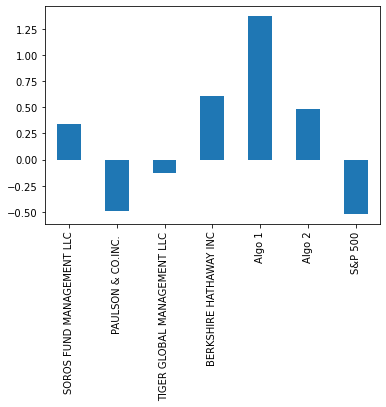

In [200]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

asr.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

Algo 1 portfolio outperforms the 'Whales' portfolios and Algo 2 outperforms most portfolios, just under Berkshire Hathaway.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [203]:
# Read the first stock
# YOUR CODE HERE
vgt_returns_csv = Path(r"C:\Users\andrew\finance\PandasHW-Rubi\vgt_google_finance - Sheet2.csv.csv")

vgt_df = pd.read_csv(vgt_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

vgt_df = vgt_df.rename(columns={"Close": "VGT"})

vgt_df.head(5)

,VGT
Date,
2018-06-15,189.04
2018-06-18,189.32
2018-06-19,188.01
2018-06-20,188.53
2018-06-21,186.86


In [204]:
# Read the second stock
# YOUR CODE HERE
vti_returns_csv = Path(r"C:\Users\andrew\finance\PandasHW-Rubi\vti_google_finance - Sheet2.csv.csv")

vti_df = pd.read_csv(vti_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

vti_df = vti_df.rename(columns={"Close": "VTI"})

vti_df.head(5)

,VTI
Date,
2018-06-15,144.15
2018-06-18,143.99
2018-06-19,143.51
2018-06-20,143.84
2018-06-21,142.85


In [207]:
# Read the third stock
# YOUR CODE HERE
vug_returns_csv = Path(r"C:\Users\andrew\finance\PandasHW-Rubi\vug_google_finance - Sheet2.csv.csv")

vug_df = pd.read_csv(vug_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

vug_df = vug_df.rename(columns={"Close": "VUG"})

vug_df.head(5)

,VUG
Date,
2018-06-15,154.21
2018-06-18,154.13
2018-06-19,153.28
2018-06-20,153.97
2018-06-21,152.73


In [213]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
vanguard_custom = pd.concat([vgt_df, vti_df, vug_df], axis="columns", join="inner")
vanguard_custom.head()



,VGT,VTI,VUG
Date,,,
2018-06-15,189.04,144.15,154.21
2018-06-18,189.32,143.99,154.13
2018-06-19,188.01,143.51,153.28
2018-06-20,188.53,143.84,153.97
2018-06-21,186.86,142.85,152.73


In [214]:
# Reset the index
# YOUR CODE HERE

vanguard_custom_dr = vanguard_custom.pct_change()

vanguard_custom_dr.head(5)

,VGT,VTI,VUG
Date,,,
2018-06-15,NaN,NaN,NaN
2018-06-18,0.001481,-0.001110,-0.000519
2018-06-19,-0.006920,-0.003334,-0.005515
2018-06-20,0.002766,0.002299,0.004502
2018-06-21,-0.008858,-0.006883,-0.008054


In [215]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
vanguard_custom_dr.head(5)

,VGT,VTI,VUG
Date,,,
2018-06-15,NaN,NaN,NaN
2018-06-18,0.001481,-0.001110,-0.000519
2018-06-19,-0.006920,-0.003334,-0.005515
2018-06-20,0.002766,0.002299,0.004502
2018-06-21,-0.008858,-0.006883,-0.008054


In [218]:
# Drop Nulls
# YOUR CODE HERE

vanguard_custom_dr = vanguard_custom_dr.dropna()

vanguard_custom_dr.head(5)

,VGT,VTI,VUG
Date,,,
2018-06-18,0.001481,-0.001110,-0.000519
2018-06-19,-0.006920,-0.003334,-0.005515
2018-06-20,0.002766,0.002299,0.004502
2018-06-21,-0.008858,-0.006883,-0.008054
2018-06-22,-0.005298,-0.002800,-0.003208


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [223]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

w = [1/3, 1/3, 1/3]

vanguard_custom_weighted_returns = (w * vanguard_custom_dr)

vanguard_port_ret = vanguard_custom_weighted_returns.sum(axis=1).rename('Vanguard Custom')

vanguard_port_ret.head(5)

Date
2018-06-18   -0.000049
2018-06-19   -0.005256
2018-06-20    0.003189
2018-06-21   -0.007931
2018-06-22   -0.003769
Name: Vanguard Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [224]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

vang_combined_df = pd.concat([combined_df, vanguard_port_ret], axis="columns", join="inner")
vang_combined_df.head(5)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Vanguard Custom
Date,,,,,,,,
2018-06-18,0.000311,-0.000263,-0.008115,0.002779,-0.003792,-0.000293,0.004040,-0.000049
2018-06-19,-0.003463,0.001864,0.009821,-0.005693,-0.006889,-0.000048,-0.001709,-0.005256
2018-06-20,0.004406,0.005695,0.009543,0.007517,0.003316,0.006758,0.006386,0.003189
2018-06-21,-0.005383,-0.005494,-0.007410,-0.011428,0.004610,-0.009596,-0.001859,-0.007931
2018-06-22,0.003406,0.004966,0.006903,-0.001542,-0.003197,0.003373,0.013916,-0.003769


In [234]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

vang_combined_df = vang_combined_df.dropna()

In [236]:
vang_combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Vanguard Custom                0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [237]:
# Risk
# YOUR CODE HERE
vang_combined_std = vang_combined_df.std()
print(vang_combined_std)


SOROS FUND MANAGEMENT LLC      0.009609
PAULSON & CO.INC.              0.007621
TIGER GLOBAL MANAGEMENT LLC    0.015171
BERKSHIRE HATHAWAY INC         0.016153
Algo 1                         0.008775
Algo 2                         0.009138
S&P 500                        0.009961
Vanguard Custom                0.011977
dtype: float64


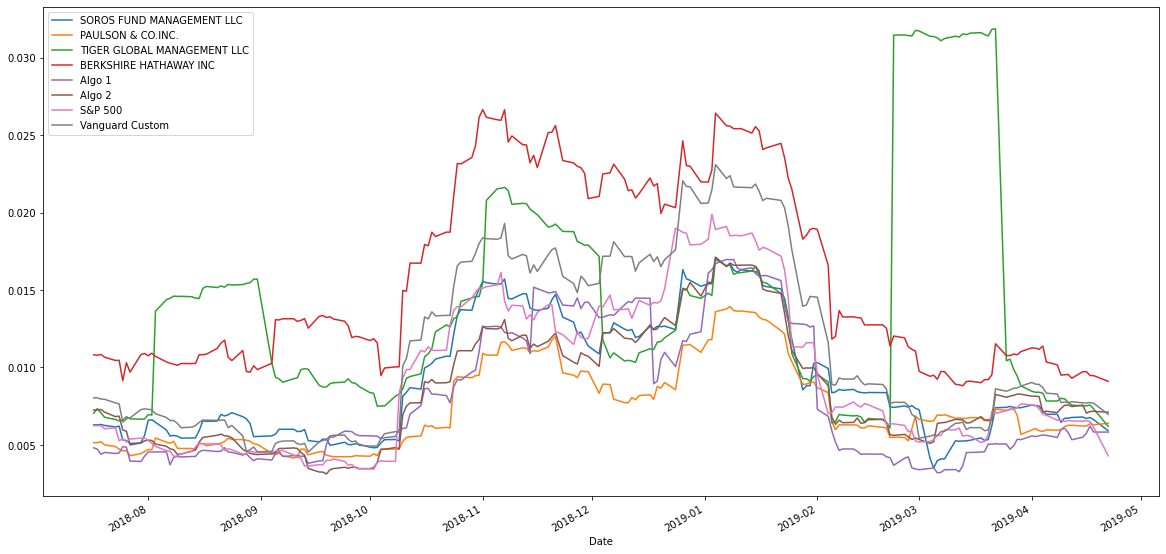

In [239]:
# Rolling
# YOUR CODE HERE

vang_daily_std_rolling = vang_combined_df.rolling(21).std()

vang_daily_std_rolling.plot(figsize=(20,10))


In [240]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

vang_custom_asr = (vang_combined_df.mean() / vang_combined_df.std()) * (252**0.5)

vang_custom_asr

SOROS FUND MANAGEMENT LLC      0.271064
PAULSON & CO.INC.             -0.083892
TIGER GLOBAL MANAGEMENT LLC   -1.376602
BERKSHIRE HATHAWAY INC        -0.146902
Algo 1                         2.179764
Algo 2                        -0.240574
S&P 500                       -0.342708
Vanguard Custom                0.486298
dtype: float64

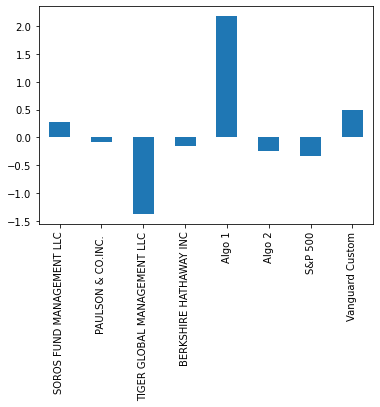

In [241]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

vang_custom_asr.plot.bar()

In [242]:
# Create a correlation analysis
# YOUR CODE HERE

vang_correlation_df = vang_combined_df.corr()

vang_correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Vanguard Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.799142,0.471144,0.823259,0.360863,0.868309,-0.045620,0.866589
PAULSON & CO.INC.,0.799142,1.000000,0.486576,0.667108,0.381764,0.794722,-0.068888,0.751574
TIGER GLOBAL MANAGEMENT LLC,0.471144,0.486576,1.000000,0.321776,0.129817,0.403769,-0.015357,0.424381
BERKSHIRE HATHAWAY INC,0.823259,0.667108,0.321776,1.000000,0.349732,0.785849,-0.047405,0.899788
Algo 1,0.360863,0.381764,0.129817,0.349732,1.000000,0.394163,-0.047065,0.319088
Algo 2,0.868309,0.794722,0.403769,0.785849,0.394163,1.000000,-0.056118,0.872073
S&P 500,-0.045620,-0.068888,-0.015357,-0.047405,-0.047065,-0.056118,1.000000,0.010389
Vanguard Custom,0.866589,0.751574,0.424381,0.899788,0.319088,0.872073,0.010389,1.000000


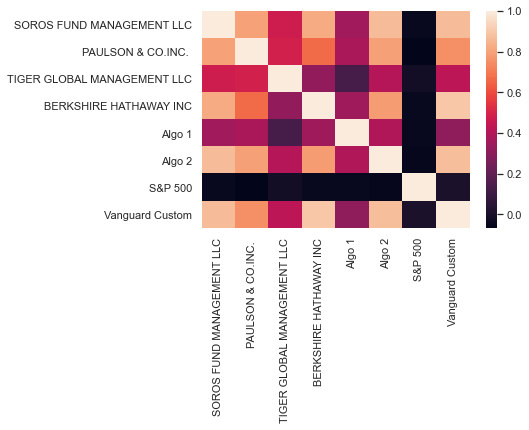

In [244]:
import seaborn as sns; sns.set()

ax = sns.heatmap(vang_correlation_df)

In [248]:
# Beta
# YOUR CODE HERE

vang_covariance = vang_combined_df['Vanguard Custom'].cov(vang_combined_df['S&P 500'])

variance_custom = vang_combined_df['S&P 500'].var()

vang_beta = vang_covariance / variance_custom

print(vang_beta)

0.0124910855871004


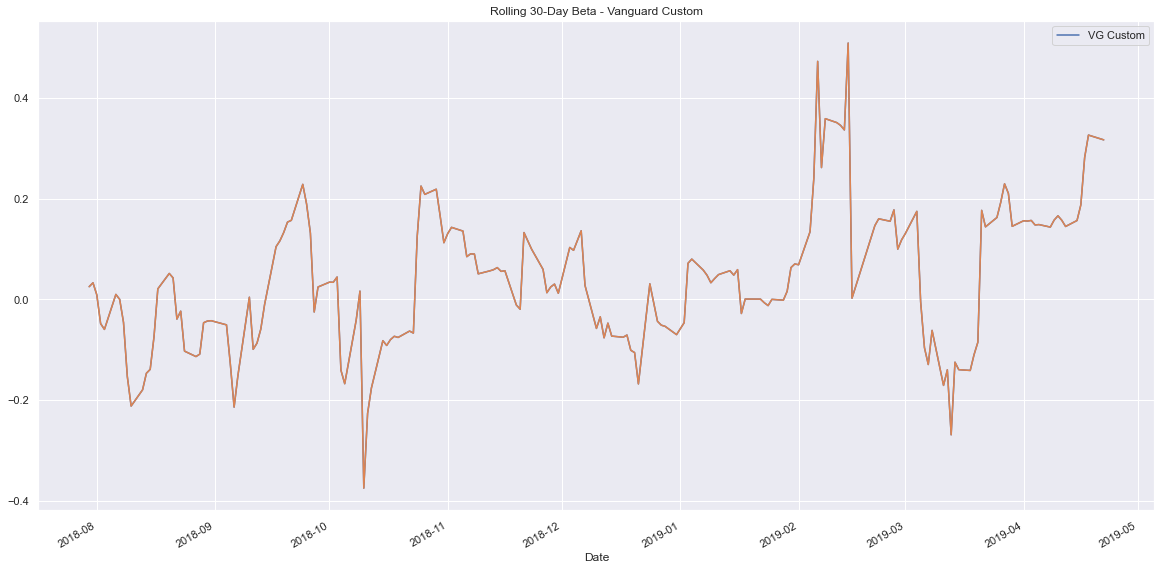

In [250]:
rolling_vang_covariance = vang_combined_df['Vanguard Custom'].rolling(window=30).cov(vang_combined_df['S&P 500'])
rolling_variance_custom = vang_combined_df['S&P 500'].rolling(window=30).var()
rolling_vang_beta = rolling_vang_covariance / rolling_variance_custom

ax1 = rolling_vang_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta - Vanguard Custom')
rolling_vang_beta.plot(ax=ax1)
ax1.legend(["VG Custom"])
